# Performing DEG analysis (limma, R) on Pseudobulking from atlas
* Primary tumour samples only
* dataframes made previously (2025-01-13_Pseudobulking.jpynb), seperate for each DC subset and each has seperate metadata file

In [1]:
library(limma)
library(edgeR)
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
# set directory
setwd('/scratch/user/s4436039/scdata/Pseudobulk')

## Load data (starting with just mregDC):

In [3]:
#load data
sampleinfo <- read.csv("pseudobulk_metadata_mregDC.csv", row.names =1)
head(sampleinfo)

,cancer_broadest
,<chr>
GGSE223063_GLIO_1,GBM
GSE112271_HCC_Pt13,HCC
GSE112271_HCC_Pt14,HCC
GSE131907_LUAD_T0006,NSCLC
GSE131907_LUAD_T0008,NSCLC
GSE131907_LUAD_T0009,NSCLC


In [4]:
dim(sampleinfo)

[1] 333   1

In [5]:
cts_mregDC <- read.csv("pseudobulk_mregDC_data.csv", row.names = 1)

In [6]:
head(cts_mregDC)

,GGSE223063_GLIO_1,GSE112271_HCC_Pt13,GSE112271_HCC_Pt14,GSE131907_LUAD_T0006,GSE131907_LUAD_T0008,GSE131907_LUAD_T0009,GSE131907_LUAD_T0018,GSE131907_LUAD_T0019,GSE131907_LUAD_T0020,GSE131907_LUAD_T0025,⋯,PMID32561858_breast_51,PRJCA005422_HGSOC1_PT,PRJCA005422_HGSOC2_PT,PRJCA005422_HGSOC3_PT,PRJCA005422_HGSOC4_PT,PRJCA005422_HGSOC6_PT,PRJCA005422_HGSOC7_PT,PRJCA005422_HGSOC8_PT,PRJCA005422_HGSOC9_PT,PRJCA005422_HGSOC10_PT
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FAM87B,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
LINC00115,0,0,0,0,0,0,0,0,0,1,⋯,0,0,0,0,0,0,1,0,0,0
FAM41C,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
SAMD11,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
NOC2L,2,0,3,3,5,0,2,5,3,4,⋯,4,1,1,1,2,0,1,0,0,0
KLHL17,0,0,0,0,0,0,0,0,0,0,⋯,1,0,0,0,0,0,0,0,0,0


In [7]:
dim(cts_mregDC)

[1] 15074   333

In [8]:
# set genes variables
genes <- data.frame(Symbol = row.names(cts_mregDC))

In [9]:
# create DGEList variable
y <- DGEList(counts = cts_mregDC, genes = genes)

In [10]:
head(y)

An object of class "DGEList"
$counts
          GGSE223063_GLIO_1 GSE112271_HCC_Pt13 GSE112271_HCC_Pt14
FAM87B                    0                  0                  0
LINC00115                 0                  0                  0
FAM41C                    0                  0                  0
SAMD11                    0                  0                  0
NOC2L                     2                  0                  3
KLHL17                    0                  0                  0
          GSE131907_LUAD_T0006 GSE131907_LUAD_T0008 GSE131907_LUAD_T0009
FAM87B                       0                    0                    0
LINC00115                    0                    0                    0
FAM41C                       0                    0                    0
SAMD11                       0                    0                    0
NOC2L                        3                    5                    0
KLHL17                       0                    0                    0
          GSE131907_LUAD_T0018 GSE131907_LUAD_T0019 GSE131907_LUAD_T0020
FAM87B                       0                    0                    0
LINC00115                    0                    0                    0
FAM41C                       0                    0                    0
SAMD11                       0                    0                    0
NOC2L                        2                    5                    3
KLHL17                       0                    0                    0
          GSE131907_LUAD_T0025 GSE131907_LUAD_T0028 GSE131907_LUAD_T0030
FAM87B                       0                    0                    0
LINC00115                    1                    1                    0
FAM41C                       0                    0                    2
SAMD11                       0                    0                    0
NOC2L                        4                    0                    3
KLHL17                       0                    0                    3
          GSE131907_LUAD_T0031 GSE131907_LUAD_T0034 GSE131907_LUAD_T1028
FAM87B                       0                    0                    0
LINC00115                    0                    0                    0
FAM41C                       0                    0                    0
SAMD11                       0                    0                    0
NOC2L                        2                    0                    0
KLHL17                       0                    0                    0
          GSE131907_LUAD_T1058 GSE139324_HNSCC_1 GSE139324_HNSCC_2
FAM87B                       0                 0                 0
LINC00115                    0                 0                 1
FAM41C                       0                 1                 0
SAMD11                       0                 0                 0
NOC2L                        2                 1                 0
KLHL17                       0                 3                 0
          GSE139324_HNSCC_3 GSE139324_HNSCC_4 GSE139324_HNSCC_5
FAM87B                    0                 0                 0
LINC00115                 1                 1                 0
FAM41C                    0                 1                 0
SAMD11                    0                 0                 0
NOC2L                     3                 0                 1
KLHL17                    0                 0                 0
          GSE139324_HNSCC_6 GSE139324_HNSCC_7 GSE139324_HNSCC_8
FAM87B                    0                 0                 0
LINC00115                 0                 0                 0
FAM41C                    1                 0                 0
SAMD11                    0                 0                 0
NOC2L                     4                 4                 3
KLHL17                    1                 0                 0
          GSE139324_HNSCC_9 GSE139324_HNSCC_10 GSE139324_HNSCC_11
FAM87B                    

In [11]:
dim(y)

[1] 15074   333

## Filtering:

In [12]:
# Keep genes with total counts more than 50.
A <- rowSums(y$counts)
isexpr <- A > 50

In [13]:
# Keep only genes with defined annotation:
hasannot <- rowSums(is.na(y$genes)) == 0

In [14]:
y <- y[isexpr & hasannot, , keep.lib.size = FALSE]
dim(y)

[1] 10018   333

## Normalise: 

In [15]:
y <- calcNormFactors(y)

In [16]:
head(y)

An object of class "DGEList"
$counts
          GGSE223063_GLIO_1 GSE112271_HCC_Pt13 GSE112271_HCC_Pt14
LINC00115                 0                  0                  0
NOC2L                     2                  0                  3
KLHL17                    0                  0                  0
HES4                      0                  2                 12
ISG15                     0                  5                 36
AGRN                      1                  0                  2
          GSE131907_LUAD_T0006 GSE131907_LUAD_T0008 GSE131907_LUAD_T0009
LINC00115                    0                    0                    0
NOC2L                        3                    5                    0
KLHL17                       0                    0                    0
HES4                         0                    1                    0
ISG15                        4                    2                    8
AGRN                         0                    3                    0
          GSE131907_LUAD_T0018 GSE131907_LUAD_T0019 GSE131907_LUAD_T0020
LINC00115                    0                    0                    0
NOC2L                        2                    5                    3
KLHL17                       0                    0                    0
HES4                         3                    2                    7
ISG15                        5                   18                   11
AGRN                         2                    1                    0
          GSE131907_LUAD_T0025 GSE131907_LUAD_T0028 GSE131907_LUAD_T0030
LINC00115                    1                    1                    0
NOC2L                        4                    0                    3
KLHL17                       0                    0                    3
HES4                         1                    0                    2
ISG15                        6                    4                   10
AGRN                         1                    0                    1
          GSE131907_LUAD_T0031 GSE131907_LUAD_T0034 GSE131907_LUAD_T1028
LINC00115                    0                    0                    0
NOC2L                        2                    0                    0
KLHL17                       0                    0                    0
HES4                         0                    0                    0
ISG15                        0                    1                    2
AGRN                         1                    1                    0
          GSE131907_LUAD_T1058 GSE139324_HNSCC_1 GSE139324_HNSCC_2
LINC00115                    0                 0                 1
NOC2L                        2                 1                 0
KLHL17                       0                 3                 0
HES4                         0                 0                 0
ISG15                        2                 1                 2
AGRN                         0                 1                 0
          GSE139324_HNSCC_3 GSE139324_HNSCC_4 GSE139324_HNSCC_5
LINC00115                 1                 1                 0
NOC2L                     3                 0                 1
KLHL17                    0                 0                 0
HES4                      4                 0                 1
ISG15                    14                29                 0
AGRN                      0                 0                 1
          GSE139324_HNSCC_6 GSE139324_HNSCC_7 GSE139324_HNSCC_8
LINC00115                 0                 0                 0
NOC2L                     4                 4                 3
KLHL17                    1                 0                 0
HES4                      1                 5                 0
ISG15                    22                35                 2
AGRN                      5                 0                 1
          GSE139324_HNSCC_9 GSE139324_HNSCC_10 GSE139324_HNSCC_11
LINC00115                 

# Multi-dimensional scaling (MDS) plot to visualise relationship between samples

In [17]:
library(RColorBrewer)

In [18]:
# create vector of colours for cancer types
cancer_types <- unique(sampleinfo$cancer_broadest)
colors <- brewer.pal(n = length(cancer_types), name = "Paired")

In [19]:
# set each cancer type to a colour
cancer_colors <- setNames(colors, cancer_types)

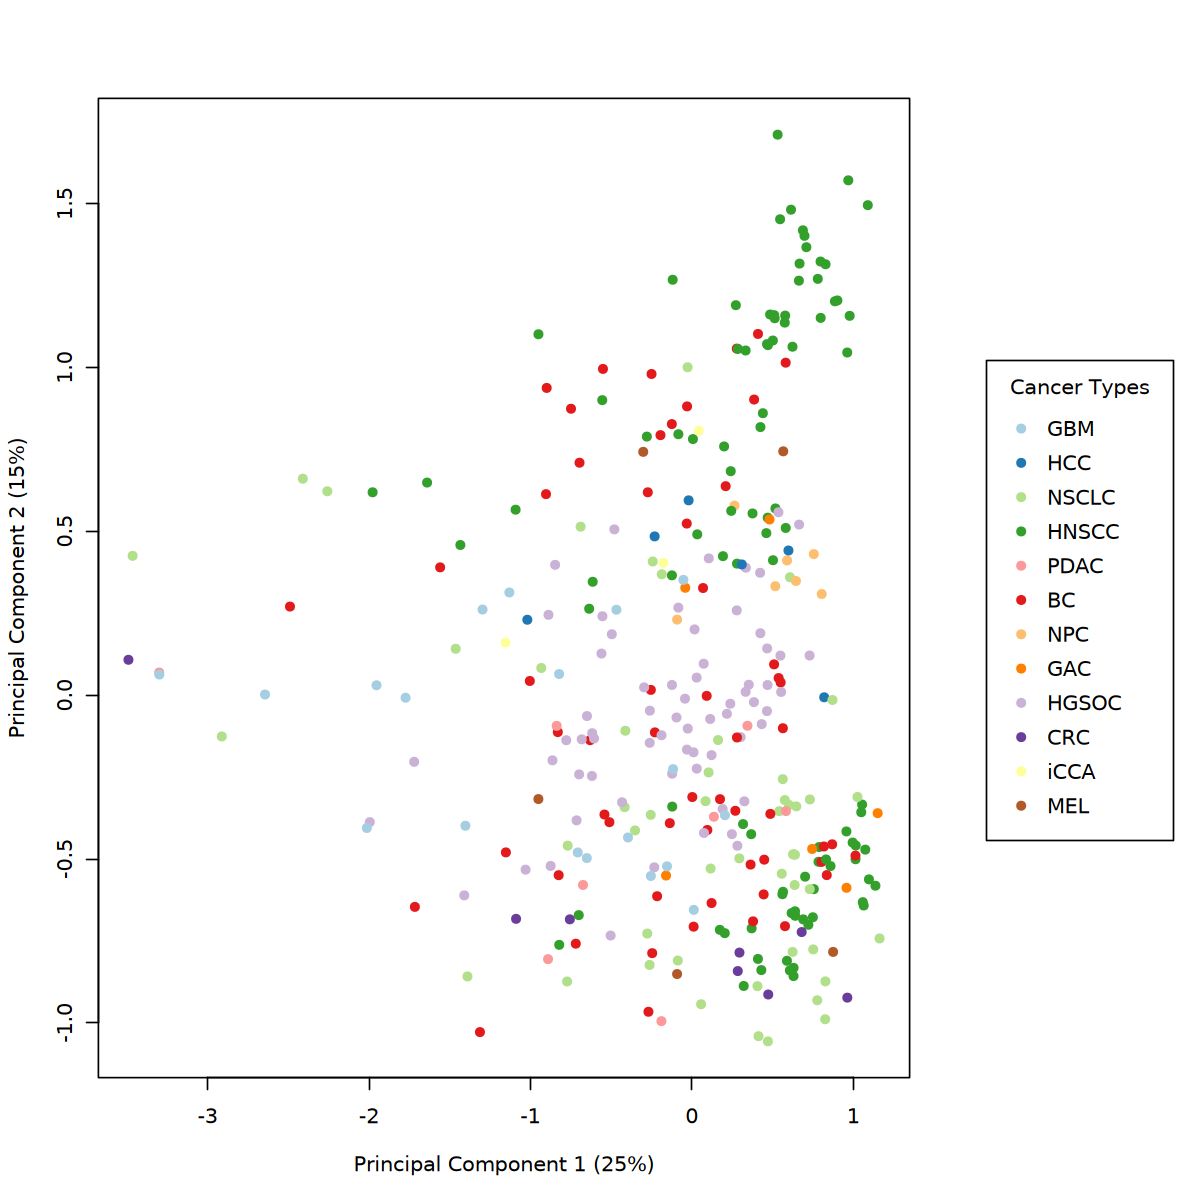

In [20]:
options(repr.plot.height=10, repr.plot.width=10)
layout(matrix(1:2, ncol = 2), widths = c(4, 1))  # Allocate space for the plot and legend

# Generate the MDS plot
plotMDS(y, 
        #labels = sampleinfo$cancer_broadest, 
        labels = NULL,
        col = cancer_colors[sampleinfo$cancer_broadest], 
        pch = 16,
        top = 50, 
        gene.selection = "common", 
        prior.count = 5)

# Add a legend
par(mar = c(0, 0, 0, 0))  # Remove margins for the legend area
plot.new()               
legend("center",                        
       legend = cancer_types,                 
       col = colors,                        
       pch = 16,                               
       title = "Cancer Types")               

# Set up model

In [21]:
# setup model
design <- model.matrix(~ 0 + cancer_broadest, data = sampleinfo)

In [22]:
colnames(design) <- c("BC","CRC","GAC","GBM","HCC","HGSOC","HNSCC","iCCA","MEL","NPC","NSCLC","PDAC")

In [23]:
head(design)

,BC,CRC,GAC,GBM,HCC,HGSOC,HNSCC,iCCA,MEL,NPC,NSCLC,PDAC
GGSE223063_GLIO_1,0,0,0,1,0,0,0,0,0,0,0,0
GSE112271_HCC_Pt13,0,0,0,0,1,0,0,0,0,0,0,0
GSE112271_HCC_Pt14,0,0,0,0,1,0,0,0,0,0,0,0
GSE131907_LUAD_T0006,0,0,0,0,0,0,0,0,0,0,1,0
GSE131907_LUAD_T0008,0,0,0,0,0,0,0,0,0,0,1,0
GSE131907_LUAD_T0009,0,0,0,0,0,0,0,0,0,0,1,0


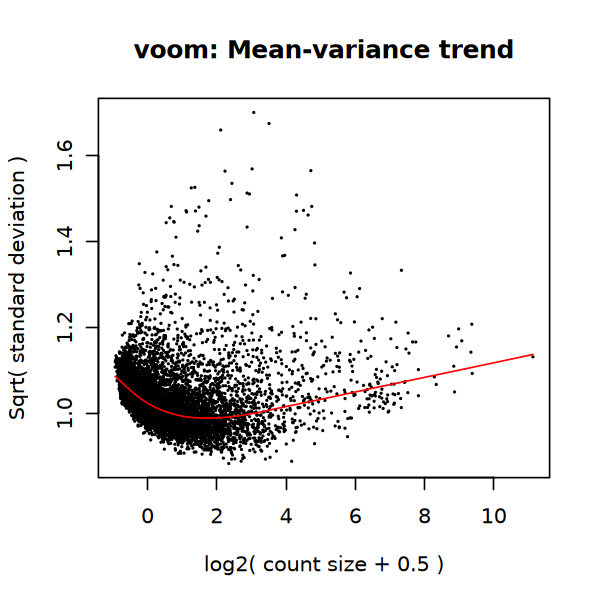

In [24]:
# voom - see here for good v bad voom plot: https://ucdavis-bioinformatics-training.github.io/2018-June-RNA-Seq-Workshop/thursday/DE.html
options(repr.plot.height=5, repr.plot.width=5)
v <- voom(y, design, plot = TRUE)

In [25]:
# lmFit
fit <- lmFit(v, design)

# Contrast - compare HGSOC to the rest

In [26]:
# make contrast matrix, apply contrasts, and fit the model 
contrast.matrix <- makeContrasts(HGSOC - (BC + CRC + GAC + GBM + HCC + HNSCC + iCCA + MEL + NPC + NSCLC + PDAC), levels=design) #compare HGSOC to rest
fit2 <- contrasts.fit(fit, contrast.matrix)
fit2 <- eBayes(fit2)

In [27]:
# check the results
tt1 <- topTable(fit2, coef=1, adjust="BH", number = Inf)

In [28]:
# determine which genes significant DEGs
results <- decideTests(fit2)
summary(results)
head(tt1)

       HGSOC - (BC + CRC + GAC + GBM + HCC + HNSCC + iCCA + MEL + NPC + NSCLC + PDAC)
Down                                                                            10018
NotSig                                                                              0
Up                                                                                  0

,Symbol,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
HNRNPA2B1,HNRNPA2B1,-87.73639,8.753108,-88.78262,2.511224e-251,1.572340e-248,375.6842
EEF1D,EEF1D,-92.26300,9.415292,-86.70488,1.063161e-247,3.435724e-245,370.7252
H3F3B,H3F3B,-102.29769,10.368169,-92.42952,1.649112e-257,2.753467e-254,370.4351
HNRNPDL,HNRNPDL,-82.09574,8.128932,-82.34702,7.871859e-240,1.213235e-237,369.7347
MORF4L1,MORF4L1,-78.88622,7.994355,-80.31402,4.967002e-236,6.298661e-234,368.3684
UBE2D3,UBE2D3,-81.70880,8.312025,-80.61629,1.335648e-236,1.784070e-234,368.1282


# Contrast - compare HGSOC to each cancer type

In [29]:
# make contrast matrix, apply contrasts, and fit the model 
contrast.matrix <- makeContrasts(HGSOC-BC,HGSOC-CRC,HGSOC-GAC,HGSOC-GBM,HGSOC-HCC,HGSOC-HNSCC,HGSOC-iCCA,HGSOC-MEL,HGSOC-NPC,HGSOC-NSCLC,HGSOC-PDAC, levels=design) #compare HGSOC to every other individually
fit2 <- contrasts.fit(fit, contrast.matrix)
fit2 <- eBayes(fit2)

In [30]:
# check the results
tt1 <- topTable(fit2, coef=1, adjust="BH", number = Inf)
tt2 <- topTable(fit2, coef=2, adjust="BH", number = Inf)
tt3 <- topTable(fit2, coef=3, adjust="BH", number = Inf)
tt4 <- topTable(fit2, coef=4, adjust="BH", number = Inf)
tt5 <- topTable(fit2, coef=5, adjust="BH", number = Inf)
tt6 <- topTable(fit2, coef=6, adjust="BH", number = Inf)
tt7 <- topTable(fit2, coef=7, adjust="BH", number = Inf)
tt8 <- topTable(fit2, coef=8, adjust="BH", number = Inf)
tt9 <- topTable(fit2, coef=9, adjust="BH", number = Inf)
tt10 <- topTable(fit2, coef=10, adjust="BH", number = Inf)
tt11 <- topTable(fit2, coef=11, adjust="BH", number = Inf)

In [31]:
# determine which genes significant DEGs
results <- decideTests(fit2)
summary(results)
head(tt1)

       HGSOC - BC HGSOC - CRC HGSOC - GAC HGSOC - GBM HGSOC - HCC HGSOC - HNSCC
Down          392          40         112         466          11          1339
NotSig       9196        9911        9358        9121       10002          4529
Up            430          67         548         431           5          4150
       HGSOC - iCCA HGSOC - MEL HGSOC - NPC HGSOC - NSCLC HGSOC - PDAC
Down              5          13         355           414           17
NotSig        10010        9992        7707          8921         9969
Up                3          13        1956           683           32

,Symbol,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MGP,MGP,-2.303742,4.361388,-10.380095,2.546752e-22,2.551336e-18,38.94321
GRASP,GRASP,1.639361,6.554478,7.582572,2.767242e-13,1.386111e-09,19.44409
GNAS,GNAS,1.287583,7.797370,7.233899,2.728009e-12,9.109730e-09,17.28564
NBEAL1,NBEAL1,-1.469707,6.511226,-6.712711,7.210924e-11,1.805976e-07,14.21677
MUCL1,MUCL1,-1.592719,3.853041,-6.618818,1.275964e-10,2.556521e-07,13.61831
IKZF1,IKZF1,1.254608,6.820040,6.546082,1.977181e-10,3.301232e-07,13.27204


# Looking at select comparisons: HGSOC v Melanoma

In [32]:
dim(tt8)

[1] 10018     7

In [33]:
# export as csv
write.csv(tt8, "HGSOC-MEL_limma.csv", quote = FALSE, row.names = FALSE)

# Compare all contrasts

In [34]:
# subgroup significant up and down degs from tt8
# 0.58 equivalent to 1.5 fold change
tt1_up_sig <- tt1[tt1$logFC > 0.58 & tt1$adj.P.Val < 0.05, ]
tt1_dn_sig <- tt1[tt1$logFC < -0.58 & tt1$adj.P.Val < 0.05, ]
# extract only the gene names
tt1_up_sig_list <- rownames(tt1_up_sig)
tt1_dn_sig_list <- rownames(tt1_dn_sig)

# subgroup significant up and down degs from tt8
# 0.58 equivalent to 1.5 fold change
tt2_up_sig <- tt2[tt2$logFC > 0.58 & tt2$adj.P.Val < 0.05, ]
tt2_dn_sig <- tt2[tt2$logFC < -0.58 & tt2$adj.P.Val < 0.05, ]
# extract only the gene names
tt2_up_sig_list <- rownames(tt2_up_sig)
tt2_dn_sig_list <- rownames(tt2_dn_sig)

# subgroup significant up and down degs from tt8
# 0.58 equivalent to 1.5 fold change
tt3_up_sig <- tt3[tt3$logFC > 0.58 & tt3$adj.P.Val < 0.05, ]
tt3_dn_sig <- tt3[tt3$logFC < -0.58 & tt3$adj.P.Val < 0.05, ]
# extract only the gene names
tt3_up_sig_list <- rownames(tt3_up_sig)
tt3_dn_sig_list <- rownames(tt3_dn_sig)

# subgroup significant up and down degs from tt8
# 0.58 equivalent to 1.5 fold change
tt4_up_sig <- tt4[tt4$logFC > 0.58 & tt4$adj.P.Val < 0.05, ]
tt4_dn_sig <- tt4[tt4$logFC < -0.58 & tt4$adj.P.Val < 0.05, ]
# extract only the gene names
tt4_up_sig_list <- rownames(tt4_up_sig)
tt4_dn_sig_list <- rownames(tt4_dn_sig)

# subgroup significant up and down degs from tt8
# 0.58 equivalent to 1.5 fold change
tt5_up_sig <- tt5[tt5$logFC > 0.58 & tt5$adj.P.Val < 0.05, ]
tt5_dn_sig <- tt5[tt5$logFC < -0.58 & tt5$adj.P.Val < 0.05, ]
# extract only the gene names
tt5_up_sig_list <- rownames(tt5_up_sig)
tt5_dn_sig_list <- rownames(tt5_dn_sig)

# subgroup significant up and down degs from tt8
# 0.58 equivalent to 1.5 fold change
tt6_up_sig <- tt6[tt6$logFC > 0.58 & tt6$adj.P.Val < 0.05, ]
tt6_dn_sig <- tt6[tt6$logFC < -0.58 & tt6$adj.P.Val < 0.05, ]
# extract only the gene names
tt6_up_sig_list <- rownames(tt6_up_sig)
tt6_dn_sig_list <- rownames(tt6_dn_sig)

# subgroup significant up and down degs from tt8
# 0.58 equivalent to 1.5 fold change
tt7_up_sig <- tt7[tt7$logFC > 0.58 & tt7$adj.P.Val < 0.05, ]
tt7_dn_sig <- tt7[tt7$logFC < -0.58 & tt7$adj.P.Val < 0.05, ]
# extract only the gene names
tt7_up_sig_list <- rownames(tt7_up_sig)
tt7_dn_sig_list <- rownames(tt7_dn_sig)

# subgroup significant up and down degs from tt8
# 0.58 equivalent to 1.5 fold change
tt8_up_sig <- tt8[tt8$logFC > 0.58 & tt8$adj.P.Val < 0.05, ]
tt8_dn_sig <- tt8[tt8$logFC < -0.58 & tt8$adj.P.Val < 0.05, ]
# extract only the gene names
tt8_up_sig_list <- rownames(tt8_up_sig)
tt8_dn_sig_list <- rownames(tt8_dn_sig)

# subgroup significant up and down degs from tt8
# 0.58 equivalent to 1.5 fold change
tt9_up_sig <- tt9[tt9$logFC > 0.58 & tt9$adj.P.Val < 0.05, ]
tt9_dn_sig <- tt9[tt9$logFC < -0.58 & tt9$adj.P.Val < 0.05, ]
# extract only the gene names
tt9_up_sig_list <- rownames(tt9_up_sig)
tt9_dn_sig_list <- rownames(tt9_dn_sig)

# subgroup significant up and down degs from tt8
# 0.58 equivalent to 1.5 fold change
tt10_up_sig <- tt10[tt10$logFC > 0.58 & tt10$adj.P.Val < 0.05, ]
tt10_dn_sig <- tt10[tt10$logFC < -0.58 & tt10$adj.P.Val < 0.05, ]
# extract only the gene names
tt10_up_sig_list <- rownames(tt10_up_sig)
tt10_dn_sig_list <- rownames(tt10_dn_sig)

# subgroup significant up and down degs from tt8
# 0.58 equivalent to 1.5 fold change
tt11_up_sig <- tt11[tt11$logFC > 0.58 & tt11$adj.P.Val < 0.05, ]
tt11_dn_sig <- tt11[tt11$logFC < -0.58 & tt11$adj.P.Val < 0.05, ]
# extract only the gene names
tt11_up_sig_list <- rownames(tt11_up_sig)
tt11_dn_sig_list <- rownames(tt11_dn_sig)

In [35]:
tt8_up_sig_list

[1] "VMP1"    "VPS13C"  "RDX"     "GBP4"    "CHD9"    "ST3GAL1" "SMARCA5"
 [8] "PTPRC"   "NDUFC1"  "PARP14"  "NABP1"   "TXNIP"   "P2RY13"

In [36]:
tt8_dn_sig_list

[1] "PMEL"   "DECR2"  "H2AFX"  "ITM2C"  "NXF1"   "CUTA"   "RAMP1"  "CD1B"  
 [9] "FDFT1"  "EIF4A3" "NXT2"   "ID1"    "CFP"

In [37]:
# combine into dataframe
up_genes_lists <- list(HGSOC_BC_up = tt1_up_sig_list, HGSOC_CRC_up = tt2_up_sig_list, HGSOC_GAC_up = tt3_up_sig_list, HGSOC_GBM_up = tt4_up_sig_list, HGSOC_HCC_up = tt5_up_sig_list,
    HGSOC_HNSCC_up = tt6_up_sig_list, HGSOC_iCCA_up = tt7_up_sig_list, HGSOC_MEL_up = tt8_up_sig_list, HGSOC_NPC_up = tt9_up_sig_list, HGSOC_NSCLC_up = tt10_up_sig_list, HGSOC_PDAC_up = tt11_up_sig_list)

In [38]:
# combine into dataframe
down_genes_lists <- list(HGSOC_BC_dn = tt1_dn_sig_list, HGSOC_CRC_dn = tt2_dn_sig_list, HGSOC_GAC_dn = tt3_dn_sig_list, HGSOC_GBM_dn = tt4_dn_sig_list, HGSOC_HCC_dn = tt5_dn_sig_list,
    HGSOC_HNSCC_dn = tt6_dn_sig_list, HGSOC_iCCA_dn = tt7_dn_sig_list, HGSOC_MEL_dn = tt8_dn_sig_list, HGSOC_NPC_dn = tt9_dn_sig_list, HGSOC_NSCLC_dn = tt10_dn_sig_list, HGSOC_PDAC_dn = tt11_dn_sig_list)

In [39]:
# Convert to dataframe, filling missing values with NA
df_up_genes <- data.frame(lapply(up_genes_lists, function(x) { length(x) <- max(lengths(up_genes_lists)); x }))
df_down_genes <- data.frame(lapply(down_genes_lists, function(x) { length(x) <- max(lengths(down_genes_lists)); x }))

In [40]:
head(df_up_genes)

,HGSOC_BC_up,HGSOC_CRC_up,HGSOC_GAC_up,HGSOC_GBM_up,HGSOC_HCC_up,HGSOC_HNSCC_up,HGSOC_iCCA_up,HGSOC_MEL_up,HGSOC_NPC_up,HGSOC_NSCLC_up,HGSOC_PDAC_up
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,GRASP,GRASP,UQCR11,NMRK1,CD81,CD81,HNRNPA3,VMP1,CD81,ARID1B,CIITA
2,GNAS,CEBPD,TAP2,PSME1,SMAP2,BHLHE41,MCL1,VPS13C,ZFPM1,MT-ND6,GNAS
3,IKZF1,CD81,DST,IL32,VMP1,TFEC,SRSF7,RDX,PRH1,CD81,GABARAPL2
4,CEBPD,CCDC88A,STIM2,TRADD,EFHD2,VAV3,NA,GBP4,LMO2,GNAS,LRRK1
5,JUND,BCLAF1,ZNF532,S100A10,ANKRD11,TRAPPC10,NA,CHD9,VEGFB,FTX,HLA-F
6,CDV3,NAMPT,NUFIP2,CYB5A,NA,JUND,NA,ST3GAL1,ZNF787,RAP1B,HLA-E


In [41]:
head(df_down_genes)

,HGSOC_BC_dn,HGSOC_CRC_dn,HGSOC_GAC_dn,HGSOC_GBM_dn,HGSOC_HCC_dn,HGSOC_HNSCC_dn,HGSOC_iCCA_dn,HGSOC_MEL_dn,HGSOC_NPC_dn,HGSOC_NSCLC_dn,HGSOC_PDAC_dn
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,MGP,TFF3,ALDOA,ZC3H11A,ALB,MTHFD2,CDK4,PMEL,ODF3B,ALDOA,IL2RA
2,NBEAL1,FXYD3,EIF4A1,PADI2,BAG3,ALDOA,COL6A1,DECR2,RPL17,RPS17,CHORDC1
3,MUCL1,NBEAL1,HIST1H2BK,ARL5A,APOA1,RPS4Y1,G6PD,H2AFX,ZNF296,SCO2,NEU1
4,AZGP1,RPS17,U2AF1,IL1B,ZFAND2A,RAMP1,COL6A2,ITM2C,ALDOA,CCL18,DNAJA4
5,TFF3,ALDOA,RAMP1,GABARAPL1,SERPINH1,TAGLN2,MRPL48,NXF1,CALCRL,SCGB3A1,MMP7
6,SERPINF2,CCDC167,POLD4,OSM,DNAJB1,NBEAL1,NA,CUTA,H2AFX,EGLN2,MRC1


In [42]:
# export to csv
write.csv(df_up_genes, "df_up_genes.csv", quote = FALSE, row.names = FALSE)
write.csv(df_down_genes, "df_down_genes.csv", quote = FALSE, row.names = FALSE)

# Performing GSEA using clusterprofiler

In [108]:
library(clusterProfiler)
library('org.Hs.eg.db')
library(enrichplot)
library(org.Hs.eg.db)
library(msigdbr)
library(dplyr)

## Gene sets I will compare: 
* inflammatory --> GOBP_POSITIVE_REGULATION_OF_IMMUNE_RESPONSE
* regulatory --> GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE

In [59]:
# Load MSigDB GO BP terms for Homo sapiens
msig_go_bp <- msigdbr(species = "Homo sapiens", category = "C5", subcategory = "GO:BP")

In [89]:
# Extract the gene sets of interest
immune_go_terms <- msig_go_bp %>%
  filter(gs_name %in% c("GOBP_POSITIVE_REGULATION_OF_IMMUNE_RESPONSE",
                        "GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE"))

In [91]:
immune_go_terms_df <- as.data.frame(immune_go_terms)

In [ ]:
#extract just the columns of interest 
immune_go_clean <- immune_go_terms_df[, c("gs_name", "entrez_gene")]
colnames(immune_go_clean) <- c("term", "ENTREZID")
head(immune_go_clean)

,term,ENTREZID
,<chr>,<int>
1,GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,2
2,GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,730249
3,GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,103
4,GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,196
5,GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,246
6,GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,259


In [64]:
head(tt1)

,Symbol,logFC,AveExpr,t,P.Value,adj.P.Val,B
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
MGP,MGP,-2.303742,4.361388,-10.380095,2.546752e-22,2.551336e-18,38.94321
GRASP,GRASP,1.639361,6.554478,7.582572,2.767242e-13,1.386111e-09,19.44409
GNAS,GNAS,1.287583,7.797370,7.233899,2.728009e-12,9.109730e-09,17.28564
NBEAL1,NBEAL1,-1.469707,6.511226,-6.712711,7.210924e-11,1.805976e-07,14.21677
MUCL1,MUCL1,-1.592719,3.853041,-6.618818,1.275964e-10,2.556521e-07,13.61831
IKZF1,IKZF1,1.254608,6.820040,6.546082,1.977181e-10,3.301232e-07,13.27204


In [65]:
#define a function to automate the GSEA process for each deg list
run_gsea <- function(gene_list, term2gene) {
  # 1. Sort genes by logFC (descending) to create a ranked list
  gene_list <- gene_list %>%
    arrange(desc(logFC))  

  # 2. Convert gene symbols (from "Symbol" column) to ENTREZ IDs
  gene_list$ENTREZID <- mapIds(org.Hs.eg.db, 
                               keys = gene_list$Symbol,  
                               column = "ENTREZID",      
                               keytype = "SYMBOL", 
                               multiVals = "first")  

  # 3. Remove genes without an ENTREZ ID
  gene_list <- gene_list %>% filter(!is.na(ENTREZID))

  # 4. Create a named numeric vector for GSEA
  ranked_genes <- setNames(gene_list$logFC, gene_list$ENTREZID)

  # 5. Run GSEA
  gsea_results <- GSEA(geneList = ranked_genes,   
                       TERM2GENE = term2gene,     
                       pvalueCutoff = 0.05)       

  return(gsea_results)  
}

In [67]:
#define list containing all my deg lists
deg_lists <- list(
  contrast_BC = tt1,  
  contrast_CRC = tt2,
  contrast_GAC = tt3,
  contrast_GBM = tt4,
  contrast_HCC = tt5,
  contrast_HNSCC = tt6,
  contrast_iCCA = tt7,
  contrast_MEL = tt8,
  contrast_NPC = tt9,
  contrast_NSCLC = tt10,
  contrast_PDAC = tt11
)

In [97]:
# run GSEA on all deg lists
gsea_results_list <- lapply(deg_lists, run_gsea, term2gene = immune_go_clean)

'select()' returned 1:many mapping between keys and columns

preparing geneSet collections...

GSEA analysis...

leading edge analysis...

done...

'select()' returned 1:many mapping between keys and columns

preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.08% of the list).
The order of those tied genes will be arbitrary, which may produce unexpected results.”
Warning message in fgseaMultilevel(pathways = pathways, stats = stats, minSize = minSize, :
“For some pathways, in reality P-values are less than 1e-10. You can set the `eps` argument to zero for better estimation.”
leading edge analysis...

done...

'select()' returned 1:many mapping between keys and columns

preparing geneSet collections...

GSEA analysis...

Warning message in preparePathwaysAndStats(pathways, stats, minSize, maxSize, gseaParam, :
“There are ties in the preranked stats (0.07%

In [98]:
# Assign contrast names to results
names(gsea_results_list) <- names(deg_lists)

In [99]:
# View GSEA results for a contrast 1
gsea_results_list[[1]]

#
# Gene Set Enrichment Analysis
#
#...@organism 	 UNKNOWN 
#...@setType 	 UNKNOWN 
#...@geneList 	 Named num [1:9805] 1.8 1.53 1.29 1.29 1.27 ...
 - attr(*, "names")= chr [1:9805] "1052" "3727" "6696" "2778" ...
#...nPerm 	 
#...pvalues adjusted by 'BH' with cutoff <0.05 
#...2 enriched terms found
'data.frame':	2 obs. of  11 variables:
 $ ID             : chr  "GOBP_POSITIVE_REGULATION_OF_IMMUNE_RESPONSE" "GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE"
 $ Description    : chr  "GOBP_POSITIVE_REGULATION_OF_IMMUNE_RESPONSE" "GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE"
 $ setSize        : int  338 122
 $ enrichmentScore: num  0.255 0.34
 $ NES            : num  1.6 1.85
 $ pvalue         : num  2.61e-05 6.45e-05
 $ p.adjust       : num  5.21e-05 6.45e-05
 $ qvalue         : logi  NA NA
 $ rank           : int  1512 1462
 $ leading_edge   : chr  "tags=27%, list=15%, signal=24%" "tags=33%, list=15%, signal=28%"
 $ core_enrichment: chr  "975/10892/65125/3620/4179/5788/5359/5336/81844/7037/2

## extract and visualise results

In [107]:
# Define the pathways of interest (immunogenic and immunoregulatory)
pathways_of_interest <- c("GOBP_POSITIVE_REGULATION_OF_IMMUNE_RESPONSE", 
                           "GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE")

# Initialize an empty list to store enrichment scores for each contrast
enrichment_scores_list <- list()

# Loop over the results and extract enrichment scores for the pathways
for (contrast in names(gsea_results_list)) {
  # Get the GSEA result for this contrast
  gsea_res <- gsea_results_list[[contrast]]
  
  # Extract the pathways of interest and their enrichment scores using base R indexing
  enriched <- gsea_res@result[gsea_res@result$ID %in% pathways_of_interest, 
                              c("ID", "NES")]  # Filter by ID and select NES
  
# Check if there are any rows in the filtered dataframe
  if (nrow(enriched) > 0) {
    # Add contrast name to the dataframe if there are results
    enriched$contrast <- contrast
  
  # Store the results
    enrichment_scores_list[[contrast]] <- enriched
  } else {
    # If no results, add a message or skip this contrast
    message(paste("No enrichment for contrast:", contrast))
  }
}


# Combine all the results into one dataframe
enrichment_scores_df <- do.call(rbind, enrichment_scores_list)

# View the dataframe
head(enrichment_scores_df)

No enrichment for contrast: contrast_GAC

No enrichment for contrast: contrast_iCCA

No enrichment for contrast: contrast_NPC



,ID,NES,contrast
,<chr>,<dbl>,<chr>
contrast_BC.GOBP_POSITIVE_REGULATION_OF_IMMUNE_RESPONSE,GOBP_POSITIVE_REGULATION_OF_IMMUNE_RESPONSE,1.598197,contrast_BC
contrast_BC.GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,1.848274,contrast_BC
contrast_CRC.GOBP_POSITIVE_REGULATION_OF_IMMUNE_RESPONSE,GOBP_POSITIVE_REGULATION_OF_IMMUNE_RESPONSE,2.399458,contrast_CRC
contrast_CRC.GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,2.146897,contrast_CRC
contrast_GBM,GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,1.406767,contrast_GBM
contrast_HCC.GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,GOBP_NEGATIVE_REGULATION_OF_IMMUNE_RESPONSE,1.653460,contrast_HCC


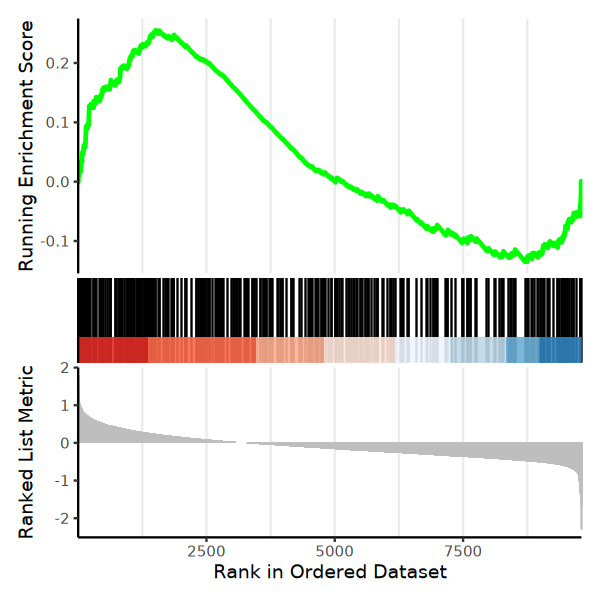

In [ ]:
# Example: Plot GSEA for the first contrast for immunostimulatory pathway
gseaplot2(gsea_results_list[[1]], geneSetID = "GOBP_POSITIVE_REGULATION_OF_IMMUNE_RESPONSE")

# Summary of results: 
* both pathways (immunostimulatory and immunoregulatory) are enriched in genes upregulated in HGSOC compared to BC, but the immunoregulatory pathway appears to be more strongly enriched (higher NES, 1.84v1.59)
* both pathways (immunostimulatory and immunoregulatory) are enriched in genes upregulated in HGSOC compared to GAC, but the immunostimulatory pathway appears to be more strongly enriched (higher NES, 2.39v2.14)
* immunoregulatory pathway is enriched in genes upregulated in HGSOC compared to GBM (NES 1.41) 
* immunoregulatory pathway is enriched in genes upregulated in HGSOC compared to HCC (NES 1.65) 

# Repeat the above for other pathways